# Grip : The Spark Foundation
## DATA SCIENCE AND BUSINESS ANALYTICS TASKS
### TASK 04 Exploratory Data Analysis - Global Terrorism
### Author : PRAJWAL N

#### In this task we are going to perform EDA process on Global Terrorism dataset

#### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = "ignore")

#### Importing the dataset

In [2]:
data = pd.read_csv("C:\\Users\\PRAJJU\\Desktop\\GL EXERCISES\\The Spark Foundation\\Task 4\\terrorism.csv",encoding="ISO-8859-1")
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
data.tail(1)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
data.info(list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

In [5]:
data.duplicated().sum()

0

In [6]:
column_names = data.columns.tolist()
column_names_str = ','.join(column_names)
print(column_names_str)

eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weapt

##### Selecting the suitable and usefull columns for the further analysis

In [7]:
df = data[["iyear","imonth","iday","country_txt", "region_txt", "provstate",
    "city", "latitude", "longitude", "success", "suicide", "attacktype1_txt", "targtype1_txt",
    "gname", "weaptype1_txt","nkill", "nwound", "property"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound,property
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN,1
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN,1


In [8]:
df.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate',
       'city', 'latitude', 'longitude', 'success', 'suicide',
       'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill',
       'nwound', 'property'],
      dtype='object')

In [9]:
df = df.rename(columns={'iyear': 'year','imonth': 'month','iday': 'day','country_txt': 'country','region_txt': 'region',
                        'provstate': 'province_state','city': 'city','latitude': 'latitude','longitude': 'longitude',
                        'success': 'successful','suicide': 'suicide_attack','attacktype1_txt': 'attack_type',
                        'targtype1_txt': 'target_type','gname': 'terrorist_group','weaptype1_txt': 'weapon_type',
                        'nkill': 'num_killed','nwound': 'num_wounded','property': 'property_damage'})

In [10]:
df.shape

(181691, 18)

In [11]:
df.isna().sum()

year                   0
month                  0
day                    0
country                0
region                 0
province_state       421
city                 434
latitude            4556
longitude           4557
successful             0
suicide_attack         0
attack_type            0
target_type            0
terrorist_group        0
weapon_type            0
num_killed         10313
num_wounded        16311
property_damage        0
dtype: int64

In [12]:
df = df.dropna()
df.head()

,year,month,day,country,region,province_state,city,latitude,longitude,successful,suicide_attack,attack_type,target_type,terrorist_group,weapon_type,num_killed,num_wounded,property_damage
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,0
5,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,1,0,Armed Assault,Police,Black Nationalists,Firearms,0.0,0.0,1
6,1970,1,2,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,0,0,Assassination,Police,Tupamaros (Uruguay),Firearms,0.0,0.0,0
7,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,1,0,Bombing/Explosion,Utilities,Unknown,Explosives,0.0,0.0,1


In [13]:
df.tail(2)

,year,month,day,country,region,province_state,city,latitude,longitude,successful,suicide_attack,attack_type,target_type,terrorist_group,weapon_type,num_killed,num_wounded,property_damage
181689,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,0,0,Bombing/Explosion,Government (General),Unknown,Explosives,0.0,0.0,-9
181690,2017,12,31,Philippines,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,0,0,Bombing/Explosion,Unknown,Unknown,Explosives,0.0,0.0,0


In [14]:
df["property_damage"] = df["property_damage"].replace(-9,0)

In [15]:
df.corr().T

,year,month,day,latitude,longitude,successful,suicide_attack,num_killed,num_wounded,property_damage
year,1.000000,-0.005193,0.017587,0.203667,0.004357,-0.071329,0.133554,0.008268,0.015041,-0.309299
month,-0.005193,1.000000,0.004284,-0.017115,-0.004071,0.000564,0.001327,0.003920,0.002922,0.002030
day,0.017587,0.004284,1.000000,-0.000198,-0.002403,-0.010918,0.002238,-0.000828,-0.001312,-0.007087
latitude,0.203667,-0.017115,-0.000198,1.000000,0.001580,-0.073979,0.068104,-0.016432,0.016019,-0.100217
longitude,0.004357,-0.004071,-0.002403,0.001580,1.000000,-0.000930,0.000513,-0.000744,0.000224,-0.002509
successful,-0.071329,0.000564,-0.010918,-0.073979,-0.000930,1.000000,-0.026959,0.056274,0.026046,0.226189
suicide_attack,0.133554,0.001327,0.002238,0.068104,0.000513,-0.026959,1.000000,0.156235,0.099684,-0.026224
num_killed,0.008268,0.003920,-0.000828,-0.016432,-0.000744,0.056274,0.156235,1.000000,0.543638,0.022705
num_wounded,0.015041,0.002922,-0.001312,0.016019,0.000224,0.026046,0.099684,0.543638,1.000000,0.024642
property_damage,-0.309299,0.002030,-0.007087,-0.100217,-0.002509,0.226189,-0.026224,0.022705,0.024642,1.000000


In [16]:
df.describe()

,year,month,day,latitude,longitude,successful,suicide_attack,num_killed,num_wounded,property_damage
count,160111.000000,160111.000000,160111.000000,160111.000000,1.601110e+05,160111.000000,160111.000000,160111.000000,160111.000000,160111.000000
mean,2003.466589,6.483140,15.526085,23.709793,-5.082945e+02,0.880639,0.038099,2.093804,3.199455,0.508497
std,12.729636,3.388316,8.803064,18.304502,2.153901e+05,0.324214,0.191435,9.755815,36.499629,0.499929
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,4.000000,8.000000,11.840929,8.617648e+00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.577061,4.378420e+01,1.000000,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.621521,6.914701e+01,1.000000,0.000000,2.000000,2.000000,1.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1384.000000,8191.000000,1.000000


#### Analysing and Visualising the dataset by performing some functions and for better understanding

In [17]:
num_killed = df.num_killed.sum()
#Total number of people got killed during the attack
num_wounded = df.num_wounded.sum()
#Total number of people got wounded during the attack
success = df.successful.sum()
#The sucess rate of the attacks 
print("Total number of people got killed during the attack :",num_killed)
print("Total number of people got wounded during the attack :",num_wounded)
print("The sucess rate of the attacks :",success)

Total number of people got killed during the attack : 335241.0
Total number of people got wounded during the attack : 512268.0
The sucess rate of the attacks : 141000


In [18]:
#damage done through weapon type
weapon = df.groupby("weapon_type")[("num_killed"),("num_wounded")].sum()
weapon = weapon.sort_values(by="num_killed",ascending=False)
weapon

,num_killed,num_wounded
weapon_type,,
Explosives,150833.0,380485.0
Firearms,138520.0,73420.0
Unknown,30472.0,16019.0
Melee,8150.0,5209.0
Incendiary,3372.0,5194.0
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",3160.0,17094.0
Chemical,535.0,13651.0
Other,120.0,105.0
Sabotage Equipment,71.0,286.0


In [19]:
# Top 10 Year that had the most number of attacks
year = df.groupby("year")["year"].count()
year = year.sort_values(ascending=False)
year = year.rename("times").reset_index()
year = year.head(10)
year

,year,times
0,2014,14905
1,2015,13369
2,2016,12307
3,2013,11338
4,2017,9833
5,2012,8092
6,2011,4903
7,1992,4738
8,2010,4725
9,2008,4500


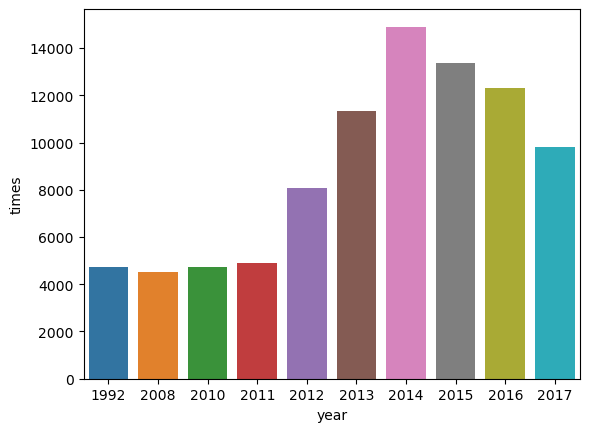

In [20]:
sns.barplot(data=year,x="year",y="times")
plt.show()

In [21]:
#Top 3 attacking methods used by the terrorists
attack_type = df.groupby("attack_type")["attack_type"].count()
attack_type = attack_type.sort_values(ascending=False)
attack_type = attack_type.rename("times").reset_index()
attack_type.head(3)

,attack_type,times
0,Bombing/Explosion,81043
1,Armed Assault,36643
2,Assassination,17384


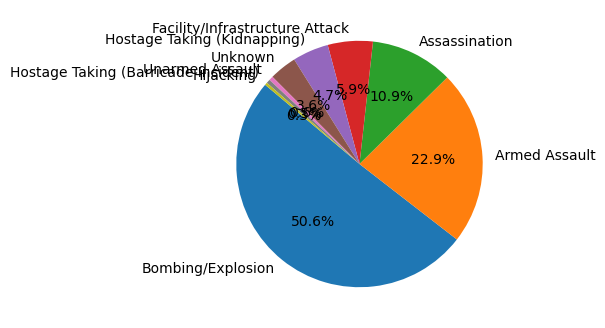

In [22]:
labels = attack_type['attack_type']
sizes = attack_type['times']
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()

In [23]:
# Most affected country by the terrorism
country = df.pivot_table(index= "country", values = "property_damage", aggfunc=np.sum)
country = country.sort_values(by= "property_damage",ascending=False)
country = country.head(5)
country

,property_damage
country,
Iraq,8019
Pakistan,6636
India,4605
Colombia,4414
Afghanistan,4337


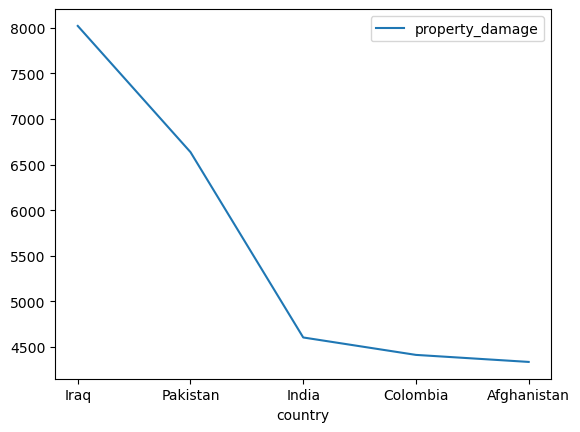

In [24]:
sns.lineplot(data=country)
plt.show()

In [25]:
# Most affected cities by the terrorism
city = df.pivot_table(index= "city", values = "property_damage", aggfunc=np.sum)
city = city.sort_values(by= "property_damage",ascending=False)
city = city.head(5)
city

,property_damage
city,
Unknown,3541
Baghdad,2716
Lima,1828
Santiago,1215
Karachi,1105


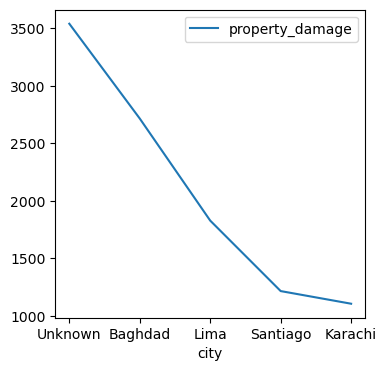

In [26]:
plt.figure(figsize=(4,4))
sns.lineplot(data=city)
plt.show()

In [27]:
# Most affected region by the terrorism
region = df.pivot_table(index= "region", values = "property_damage", aggfunc=np.sum)
region = region.sort_values(by= "property_damage",ascending=False)
region = region.head()
region

,property_damage
region,
South Asia,18592
Middle East & North Africa,18551
South America,11548
Western Europe,9973
Sub-Saharan Africa,6852


In [28]:
#The most targeted sector by the terrorist
target = df.groupby("target_type")["target_type"].count()
target = target.sort_values(ascending=False)
target = target.rename("times").reset_index()
target

,target_type,times
0,Private Citizens & Property,37511
1,Military,22993
2,Police,22530
3,Government (General),19467
4,Business,18368
5,Transportation,6078
6,Unknown,5669
7,Utilities,4926
8,Religious Figures/Institutions,4136
9,Educational Institution,4018


In [29]:
#Top 5 most ferocious terrorist groups 
terrorist_group = df.groupby("terrorist_group")["terrorist_group"].count()
terrorist_group = terrorist_group.sort_values(ascending=False)
terrorist_group = terrorist_group.rename("times").reset_index()
terrorist_group.head()

,terrorist_group,times
0,Unknown,76418
1,Taliban,6792
2,Islamic State of Iraq and the Levant (ISIL),4704
3,Shining Path (SL),3779
4,New People's Army (NPA),2394


In [30]:
def attacks_in_country(x):
    attacks_in_country = df[df["country"] == x]
    num_attacks = len(attacks_in_country)
    print(f"The country India has been attacked {num_attacks} times.")

In [31]:
attacks_in_country("India")

The country India has been attacked 11333 times.


In [32]:
attacks_in_country("Iran")

The country India has been attacked 546 times.


In [33]:
attacks_in_country("Pakistan")

The country India has been attacked 13815 times.


In [34]:
attacks_in_country("United States")

The country India has been attacked 2737 times.


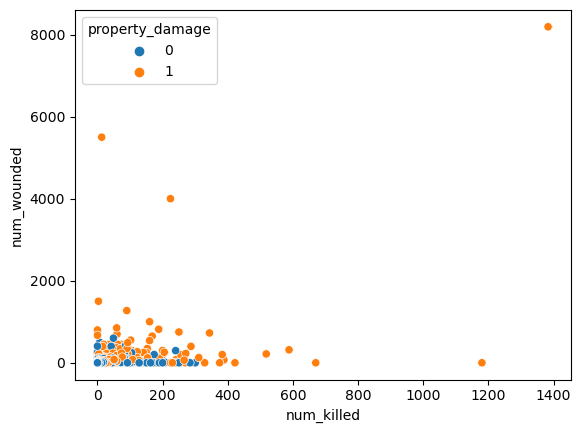

In [35]:
# Scatter plot
sns.scatterplot(data=df,x="num_killed",y="num_wounded",hue="property_damage")
plt.show()

### Observations:

*   Most Common Weapon Types: Explosives and firearms were the most common weapon types used in terrorist attacks, resulting in the highest number of casualties.

*  Years with Most Attacks: The years 2014, 2015, and 2016 had the highest numbers of terrorist attacks, with 2014 having the most attacks (14,905).

*  Most Frequent Attack Types: The top three attack types used by terrorists were "Bombing/Explosion," "Armed Assault," and "Assassination."

*  Most Affected Countries: Iraq, Pakistan, India, Colombia, and Afghanistan were the countries most affected by terrorism in terms of property damage.

*  Most Affected Cities: The most affected cities included Baghdad, Lima, Santiago, and Karachi in terms of property damage.

*  Most Affected Regions: South Asia and the Middle East & North Africa were the regions most affected by terrorism in terms of property damage.

*  Most Targeted Sectors: The sectors most targeted by terrorists were "Private Citizens & Property," "Military," and "Police."

*  Most Frequent Terrorist Groups: The most common terrorist groups mentioned in the dataset were "Taliban," "Islamic State of Iraq and the Levant (ISIL)," "Shining Path (SL)," and "New People's Army (NPA)."

*  Country-Specific Analysis: You conducted country-specific analyses to determine the number of attacks in India, Iran, Pakistan, and the United States. For instance, India had been attacked 11,333 times according to the dataset.

## Thank You